In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

## header=None -> 파일에 헤더가 없는 상태이므로 첫 번째 행이 컬럼명이 되지 않도록 설정
df = pd.read_csv("/Users/jangsohyun/Desktop/Introduction_to_AI/car_evaluation.csv", header=None)

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# 각 컬럼명을 직접 지정
# 가격, 유지비, 문의 갯수, 수용 인원, 트렁크 크기, 안전성, 평가 결과
df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']

print(df.columns)

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')


In [6]:
# 결측치 확인
print(df.isnull().sum())

# 레이블 불균형 여부를 위한 갯수 확인 (숫자)
print(df['output'].value_counts())

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64
output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
# X와 Y 분할
X = df.drop('output', axis=1) # Feature
y = df['output'] # Label

# One-Hot Encoding하면서 Numpy으로 변환
X = pd.get_dummies(X).values
y = pd.get_dummies(y).values 
print(X)
print(y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("Y_train.shape : ", y_train.shape)
print("Y_test.shape : ", y_test.shape)

[[False False False ... False  True False]
 [False False False ... False False  True]
 [False False False ...  True False False]
 ...
 [False  True False ... False  True False]
 [False  True False ... False False  True]
 [False  True False ...  True False False]]
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False False  True False]
 [False  True False False]
 [False False False  True]]
X_train.shape :  (1382, 21)
X_test.shape :  (346, 21)
Y_train.shape :  (1382, 4)
Y_test.shape :  (346, 4)


In [10]:
# 딥러닝
model = Sequential()

model.add(Dense(20,input_shape=(21,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='softmax')) # 출력층 : 4진 분류이므로 뉴런 개수 4개/ 그에 맞는 활성화 함수와 loss function 사용

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

 # 모델 구조 출력
model.summary()


model_history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# 예측
y_pred = model.predict(X_test)

/Users/jangsohyun/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,364 (5.33 KB)

 Trainable params: 1,364 (5.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0975 - loss: 1.8063 - val_accuracy: 0.5324 - val_loss: 1.2598
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.6003 - loss: 1.1316 - val_accuracy: 0.6331 - val_loss: 0.9467
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7442 - loss: 0.8101 - val_accuracy: 0.6763 - val_loss: 0.7752
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7430 - loss: 0.6420 - val_accuracy: 0.7338 - val_loss: 0.6383
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8230 - loss: 0.4500 - val_accuracy: 0.7482 - val_loss: 0.5361
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.8553 - loss: 0.3915 - val_accuracy: 0.7914 - val_loss: 0.4684
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8663 - loss: 0.3540 - val_accuracy: 0.8201 - val_loss: 0.4181
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8909 - loss: 0.2919 - val_accuracy: 0.84

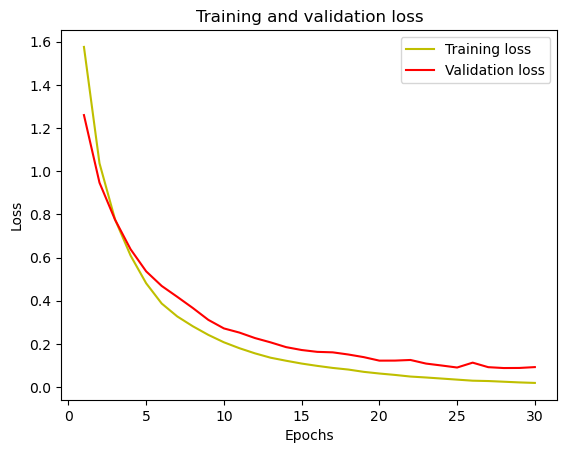

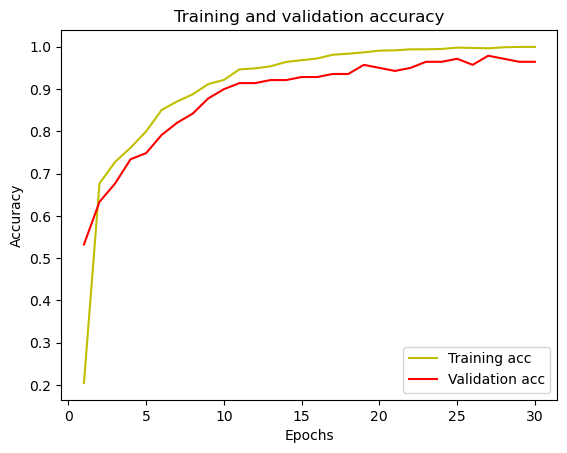

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        83
           1       0.69      1.00      0.81        11
           2       0.99      1.00      0.99       235
           3       1.00      0.71      0.83        17

    accuracy                           0.97       346
   macro avg       0.91      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346

[[ 78   3   2   0]
 [  0  11   0   0]
 [  1   0 234   0]
 [  3   2   0  12]]
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9489 - loss: 0.1126
[0.08197949081659317, 0.9682080745697021]


In [12]:
# 분류 문제에서 one-hot 인코딩된 데이터를 성능 평가에 쓰기 위해 다시 정수 라벨로 바꾸는 코드
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

# 에폭마다 훈련 손실과 검증 손실이 어떻게 달라지는지 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 에폭마다 훈련 정확도와 검증 정확도가 어떻게 달라지는지 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 성능 평가
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))


print(model.evaluate(X_test, y_test))
